In [1]:
import pandas as pd
import numpy as np
import sonny_acquire
import prepare
import acquire

In [2]:
df = pd.read_csv('new_repos_dict.csv')
df['category'] = 'unknown'
df.loc[:200, 'category'] = 'gasoline'
df.loc[200:400, 'category'] = 'wind_energy'
df.loc[400:, 'category'] = 'solar_power'
df = df[['language','category','repo','readme_contents']]
df.head()

,language,category,repo,readme_contents
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....


In [3]:
df[df.language.isna()].category.value_counts()

wind_energy    16
solar_power    15
gasoline       12
Name: category, dtype: int64

In [4]:
df = prepare.prep_repo_data(df)
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [5]:
df.head()

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...


In [6]:
df = df[df.index!=135]
df = df[df.index!=269]

In [7]:
df.shape

(408, 7)

In [8]:
df.category.value_counts()

solar_power    151
wind_energy    135
gasoline       122
Name: category, dtype: int64

In [9]:
df['word_count'] = df.clean_lemmatized.str.split().apply(len)

In [10]:
df = df.replace('Matlab','MATLAB')

## Exploration

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import nltk.sentiment
import re

In [12]:
plt.rc('figure', figsize=(14,8))
plt.rc('font', size=13)

Text(0.5, 0, 'Number of occurances')

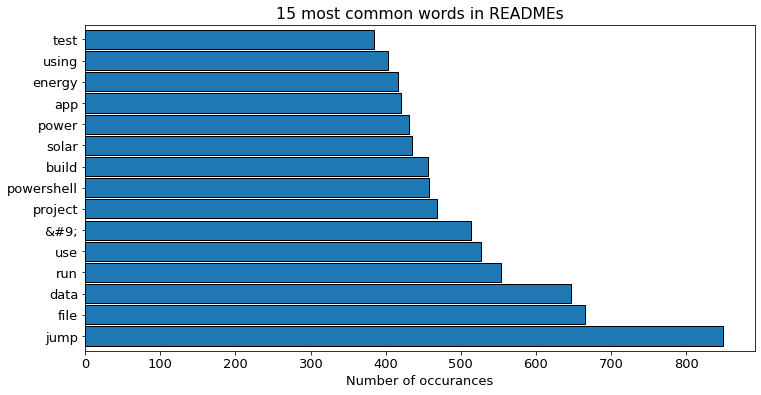

In [13]:
# What are the most common words in READMEs?
all_words = ' '.join(df.clean_lemmatized).split()
plt.figure(figsize=(12,6))
pd.Series(all_words).value_counts().head(15).plot.barh(width=.9, ec='black', title='15 most common words in READMEs')
plt.xlabel('Number of occurances')

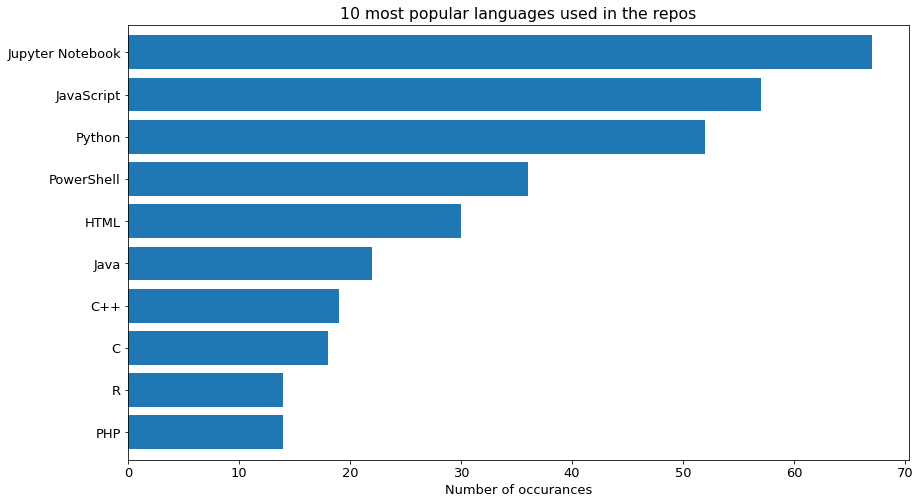

In [14]:
plt.figure(figsize=(14,8))
df.language.value_counts().sort_values(ascending=True).tail(10).plot.barh(width=.8)
plt.title('10 most popular languages used in the repos')
plt.xlabel('Number of occurances')
plt.show()

- Does the length of the README vary by programming language?

In [15]:
df.head()

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized,word_count
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,105
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...,345
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...,27
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...,61
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...,244


In [16]:
df.language.value_counts().head(10)

Jupyter Notebook    67
JavaScript          57
Python              52
PowerShell          36
HTML                30
Java                22
C++                 19
C                   18
PHP                 14
R                   14
Name: language, dtype: int64

In [17]:
df.groupby('language').word_count.mean().sort_values(ascending=False)

language
TSQL                 774.000000
Objective-C          563.000000
JavaScript           539.807018
Visual Basic         522.000000
OCaml                345.000000
Ruby                 320.400000
PostScript           264.000000
Scala                245.000000
Python               224.750000
HTML                 206.766667
R                    204.785714
Makefile             187.000000
Go                   147.500000
Jupyter Notebook     140.985075
Modelica             135.000000
MATLAB               130.923077
C++                  112.631579
M                    103.000000
CMake                101.000000
Java                  97.363636
C#                    96.666667
CSS                   91.900000
PowerShell            90.527778
Perl                  77.000000
Eagle                 72.000000
PHP                   70.857143
Arduino               66.000000
C                     64.944444
TypeScript            56.833333
ActionScript          49.000000
Processing            45.500000

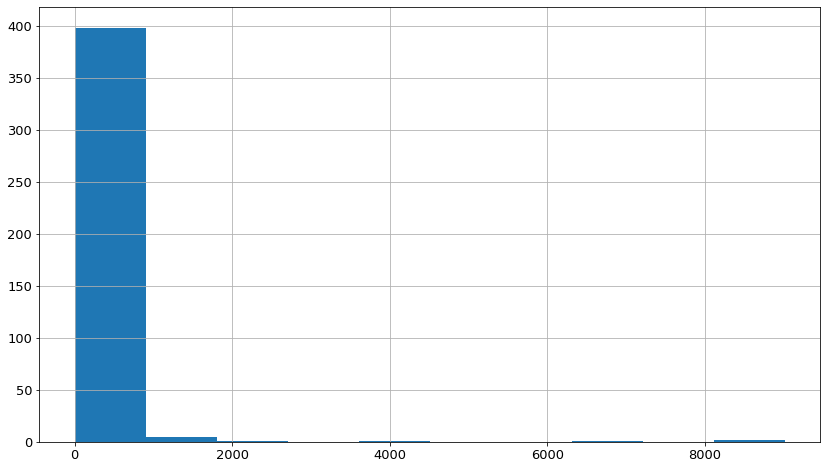

In [18]:
df.word_count.hist()

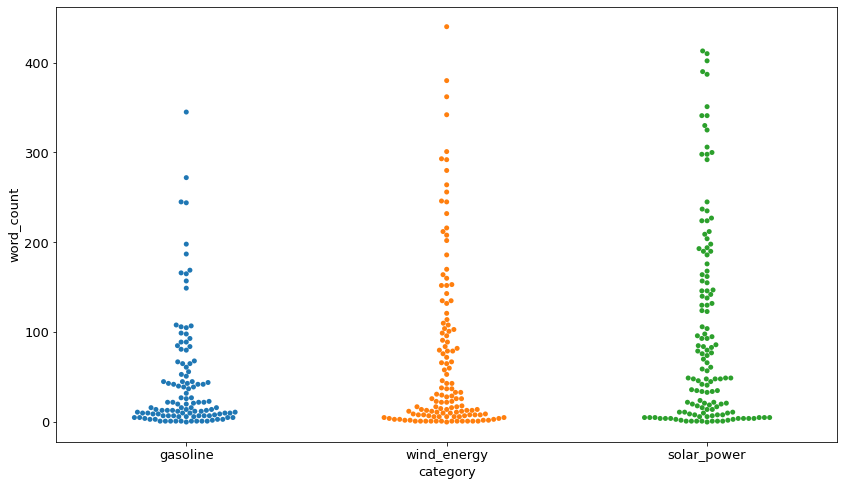

In [19]:
# swarm plot for energy category and README word counts
sns.swarmplot(x=df['category'], y=df[df.word_count < 500].word_count);

In [20]:
# get top 10 popular languages
top_language = list(df.language.value_counts().head(10).index)
top_language
df[df.language.isin(top_language)].language

0                     C
3                Python
5                     C
7      Jupyter Notebook
8                Python
             ...       
403              Python
405          JavaScript
406    Jupyter Notebook
408                HTML
409                 PHP
Name: language, Length: 329, dtype: object

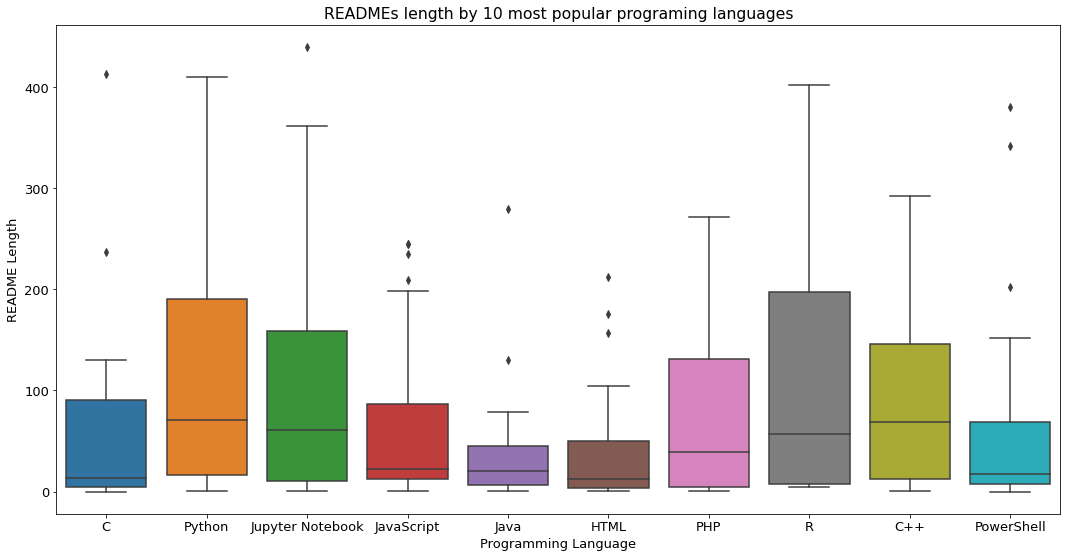

In [21]:
plt.figure(figsize=(18,9))
sns.boxplot(y=df[df.word_count < 500].word_count, x=df[df.language.isin(top_language)].language)
plt.title("READMEs length by 10 most popular programing languages")
plt.xlabel('Programming Language')
plt.ylabel('README Length')
plt.show()

Do different programming languages use a different number of unique words?

In [28]:
len(set(df.clean_lemmatized[0].split(' ')))

69

In [36]:
len(set(df[df.language=='Python'].clean_lemmatized.str.cat(sep=' ')\
    .split(' ')))

3527

In [37]:
len(set(df[df.language=='Java'].clean_lemmatized.str.cat(sep=' ')\
    .split(' ')))

1111

In [51]:
uniques = []
for lang in top_language:
    uniques.append(len(set(df[df.language==lang].clean_lemmatized\
                           .str.cat(sep=' ').split(' '))))
    
pd.Series(uniques, index=top_language).sort_values(ascending=False)

JavaScript          4076
Python              3527
Jupyter Notebook    2850
HTML                1960
PowerShell          1383
R                   1263
Java                1111
C++                 1094
C                    752
PHP                  603
dtype: int64

In [53]:
df.language.value_counts().head(10)

Jupyter Notebook    67
JavaScript          57
Python              52
PowerShell          36
HTML                30
Java                22
C++                 19
C                   18
PHP                 14
R                   14
Name: language, dtype: int64

## Word Clouds

In [ ]:
from wordcloud import WordCloud
# Look at the programming language value counts and create a word cloud of the words
all_cloud = WordCloud(background_color='white').generate(' '.join(df.language))
plt.figure(figsize=(12, 6))
plt.imshow(all_cloud)
plt.title('Programming Languages')
plt.axis('off')
plt.show()

In [ ]:
all_words = " ".join(df.clean_lemmatized).split()
text = ' '.join(all_words)
wc = WordCloud(background_color='white', width=1200, height=900)
img = wc.generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.title('Words in READMEs')
plt.axis('off')

## Hypothesis Testing 

### Chi Square test

In [ ]:
from scipy import stats

In [ ]:
df.head()

$H_0$:  Using a programming language and being in a specific energy category are independent of each other.

$H_a$:  Using a programming language and being in a specific energy category are dependent on each other.

In [ ]:
observed = pd.crosstab(df.category, df.language)
observed

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('alpha = 0.01')

In [ ]:
print(f'''
Because p ({p:.4f}) < alpha (.05),  reject the null hypothesis, 
which indicates that using a programming language and being in a \
specific energy category are dependent on each other. 
''')

## T-Test

$H_0$: There is no difference in README length between Python and Java.

$H_a$: There is a difference in README length between Python and Java.

In [ ]:
df[df.language == 'Python'].word_count.median()

In [ ]:
df[df.language == 'Java'].word_count.median()

In [ ]:
x1 = df[df.language == 'Python'].word_count
x2 = df[df.language == 'Java'].word_count

In [ ]:
alpha = 0.05
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 
print('tstat =', tstat)
print('p =', p)

In [ ]:
print(f'''
Because p ({p:.4f}) > alpha (.05) , failed to reject the null \
hypothesis, which indicate that there is no significant difference \
in readme length between repostories using Python and Java. 
''')